### 0 PROLOGUE:
<hr style="height: 0.5px; border: 0; background-color: #808080">
<style>
    h1, h2, h3, h4 {
        color: salmon;  /* Change the color to your preference */
    }
</style>

#### FEATURES:
<ol>
    <li><strong>Name -</strong> The Car Model</li>
    <li><strong>Price -</strong> The Car's Listing Price</li>
    <li><strong>Mileage -</strong> The Total Distance in Miles the Car has Driven</li>
    <li><strong>Transmission -</strong> The Car's Transmission Type</li>
    <li><strong>Fuel Type -</strong> The Car's Fuel Type</li>
    <li><strong>Seats -</strong> The Number of Seats Within the Car</li>
    <li><strong>Owners -</strong> The Number of Previous Owners</li>
    <li><strong>Doors -</strong> The Number of Doors the Car has</li>
    <li><strong>Engine -</strong> The Engine Size in Litres</li>
</ol>

#### ANSWERS TO THE FOLLOWING QUESTIONS ARE GIVEN:
<ol>
    <li>What is the correlation between a car's age and its mileage?</li>
    <li>Do automatic or manual cars tend to higher average prices?</li>
    <li>How has the average price of cars changed over the years?</li>
    <li>Do cars with larger engines generally have higher listing prices?</li>
    <li>Is there a correlation between the number of owners and the car's listing price?</li>
</ol>



### 1 Data Mining:
<hr style="height: 0.5px; border: 0; background-color: #808080">

In [ ]:
from bs4 import BeautifulSoup
import requests
import csv
import re

your_post_code = 'x'

def extract_engine_size(text):
    match = re.search(r'(\d+(\.\d+)?)L', text)
    return match.group(1) if match else "N/A"

with open(csv_file_name, "a", newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["Name", "Price", "Year", "Mileage", "Transmission", "Fuel Type", "Seats", "Owners", "Doors", "Engine"])

    for i in range(1, 3000):
        url = "To protect the website, url has not been included"
    
        with requests.Session() as session:
            response = session.get(url)
            soup = BeautifulSoup(response.text, 'html.parser')
            
            car_links = soup.find_all("div", class_="VehicleTile_container__YcPgg")
            for car_link in car_links:
                car_link = car_link.find("a")['href']
                car_link = "https://heycar.com/" + car_link
                
                response2 = session.get(car_link)
                soup2 = BeautifulSoup(response2.text, 'html.parser')
                
                car_name_element = soup2.find("h4", class_="Variant_typography__FyCit Variant_h4__OITzp VehicleAttributes_vehiclePrettyName__KdGs9")
                car_name = car_name_element.text.strip() if car_name_element else "N/A"
                
                car_price_element = soup2.find("h3", class_="Variant_typography__FyCit Variant_h3__mBZXX TotalPrice_totalPrice__mFrNf")
                reduced_car_price_element = soup2.find("h3", class_="Variant_typography__FyCit Variant_h3__mBZXX ReducedPrice_price__IIcXY")
                
                if reduced_car_price_element:
                    car_price = reduced_car_price_element.text.strip()
                elif car_price_element:
                    car_price = car_price_element.text.strip()
                else:
                    car_price = "N/A"
                
                car_information = soup2.find_all("li", class_="PdpOverview_keyInfoItem__mvKH4")

                if len(car_information) >= 8:
                    year = car_information[0].text.strip()
                    mileage = car_information[1].text.strip()
                    transmission = car_information[2].text.strip()
                    fuel_type = car_information[3].text.strip()
                    num_seats = car_information[4].text.strip()
                    num_owners = car_information[5].text.strip()
                    num_doors = car_information[6].text.strip()
                    engine_size = extract_engine_size(car_information[7].text.strip())
                else:
                    year = "N/A"
                    mileage = "N/A"
                    transmission = "N/A"
                    fuel_type = "N/A"
                    num_seats = "N/A"
                    num_owners = "N/A"
                    num_doors = "N/A"
                    engine_size = "N/A"

                csv_row = [car_name, car_price, year, mileage, transmission, fuel_type, num_seats, num_owners, num_doors, engine_size]
                csv_writer.writerow(csv_row)

                formatted_row = ','.join(map(str, csv_row))
                print(formatted_row)


This Python script utilises the BeautifulSoup libary to scrape information from a UK car listing website. The script iterates through multiple pages of car listings, extracts details such as name, price, year, mileage, transmission, fuel type, number of seats, owners, doors, and engine size and then append this information to a CSV file. This scraping process involves making HTTP requests to the website, parising the HTML content using BeautifulSoup, using the link to the listing and then once again parsing more information. The script also includes error handling to handle variations in the HTML structure. 

### 2 IMPORTING LIBRARIES:
<hr style="height: 0.5px; border: 0; background-color: #808080">

#### LIBRARIES:
<ol>
    <li>Libary<strong> pandas</strong> will be required to work with data in tabular form.</li>
    <li>Libary<strong> numpy</strong> will be required to round the data.</li>
    <li>Libary<strong> fuzzywuzzy</strong> will be used to help deal with spelling mistakes in listings.</li>
    <li>Libary<strong> missingo</strong> will be required to visualise the missing data.</li>
    <li>Libary<strong> collections</strong> will be required to count the values in the list.</li>
    <li>Library <strong>matplotlib, seaborn, plotly</strong> required for data visualization.</li>
    <li>Library <strong>scipy</strong> will be required to test hypotheses.</li>
</ol>

In [26]:
import pandas as pd
import numpy as np
import missingno
import fuzzywuzzy
from fuzzywuzzy import process
import collections
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

### 3 DATA CLEANING
<hr style="height: 0.5px; border: 0; background-color: #808080">


#### 3.1 Data Types:

In [3]:
# Reading the data
used_cars = pd.read_csv('/Users/Coding/Desktop/Used_Cars_Data_Analysis/hey_car_data.csv')
used_cars.head() # Displaying the first 5 lines of the dataset

Name    Price  Year       Mileage    Transmission Fuel Type  \
0  Nissan Qashqai  £19,428  2021  11,738 miles  Semi-automatic    Petrol   
1  Nissan Qashqai  £23,495  2023   4,076 miles          Manual    Hybrid   
2  Hyundai Tucson  £16,999  2019  27,341 miles  Semi-automatic    Petrol   
3  Hyundai Tucson  £32,367  2023   8,325 miles  Semi-automatic    Hybrid   
4    Toyota Yaris  £16,490  2020  19,182 miles       Automatic    Hybrid   

     Seats      Owners    Doors  Engine  
0  5 seats  1 owner(s)  5 doors     1.3  
1  5 seats   155.6 bhp  5 doors     1.3  
2  5 seats  1 owner(s)  5 doors     1.6  
3  5 seats   226.6 bhp  5 doors     1.6  
4  5 seats  1 owner(s)  5 doors     1.5

In [4]:
# Let's lool at the dimensions of the data
print(f'The data contains {used_cars.shape[0]} rows and {used_cars.shape[1]} columns.')

The data contains 39612 rows and 10 columns.


In [5]:
# Let's now look into the data types of the columns
used_cars.dtypes

Name             object
Price            object
Year             object
Mileage          object
Transmission     object
Fuel Type        object
Seats            object
Owners           object
Doors            object
Engine          float64
dtype: object


The majority of the columns are of type <strong>'object'</strong>, indicating textual or categorical data. Only the <strong>'Engine'</strong> column is listed as numerical. <strong>'Price', 'Mileage', 'Seats', 'Owners'</strong>, and <strong>'Doors'</strong> should all also be of numerical type. Columns <strong>'Transmission'</strong> and <strong>'Fuel Type'</strong> should be of category data types for improved analysis, reflecting their categorical nature in the dataset. Making these adjustments will enhance the dataset's structure, enabling more accurate and insightful analyses.

In [6]:
# Changing 'Transmission' and 'Fuel Type' data types
used_cars['Transmission'] = used_cars['Transmission'].astype('category')
used_cars['Fuel Type'] = used_cars['Fuel Type'].astype('category')

In [7]:
# Chaning 'Price' into the float data type
used_cars['Price'] = used_cars['Price'].replace({'\£': '', ',': ''}, regex=True).astype(float)

In [8]:
# Changing 'Mileage' into the float data type
used_cars['Mileage'] = used_cars['Mileage'].replace({' miles': '', ',': ''}, regex=True).astype(float)

In [9]:
# Changing 'Seats' into the float data type
used_cars['Seats'] = used_cars['Seats'].replace('', np.nan)
used_cars['Seats'] = used_cars['Seats'].replace({'[^0-9]': ''}, regex=True)
used_cars['Seats'] = used_cars['Seats'].replace({'seats': ''}, regex=True).astype(float)

In [10]:
# Changing 'Owners' into the float data type
used_cars['Owners'] = used_cars['Owners'].replace({'[^0-9]': ''}, regex=True).astype(float)
used_cars['Owners'] = np.where(used_cars['Owners'] > 10, np.nan, used_cars['Owners'])

In [11]:
# Changing 'Doors' into the float data type
used_cars['Doors'] = used_cars['Doors'].replace({'[^0-9]': ''}, regex=True)
used_cars['Doors'] = pd.to_numeric(used_cars['Doors'], errors='coerce').astype(float) 

In [12]:
used_cars.head()

Name    Price  Year  Mileage    Transmission Fuel Type  Seats  \
0  Nissan Qashqai  19428.0  2021  11738.0  Semi-automatic    Petrol    5.0   
1  Nissan Qashqai  23495.0  2023   4076.0          Manual    Hybrid    5.0   
2  Hyundai Tucson  16999.0  2019  27341.0  Semi-automatic    Petrol    5.0   
3  Hyundai Tucson  32367.0  2023   8325.0  Semi-automatic    Hybrid    5.0   
4    Toyota Yaris  16490.0  2020  19182.0       Automatic    Hybrid    5.0   

   Owners  Doors  Engine  
0     1.0    5.0     1.3  
1     NaN    5.0     1.3  
2     1.0    5.0     1.6  
3     NaN    5.0     1.6  
4     1.0    5.0     1.5

#### 3.2 Missing Values:

Let's calculate the percentage of blanks and filled values for all columns.

In [13]:
for col in used_cars.columns:
    pct_missing = used_cars[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

Name - 0.0%
Price - 0.0%
Year - 0.1%
Mileage - 0.1%
Transmission - 0.1%
Fuel Type - 0.1%
Seats - 0.1%
Owners - 1.6%
Doors - 4.6%
Engine - 10.2%


Visualise the missing values.

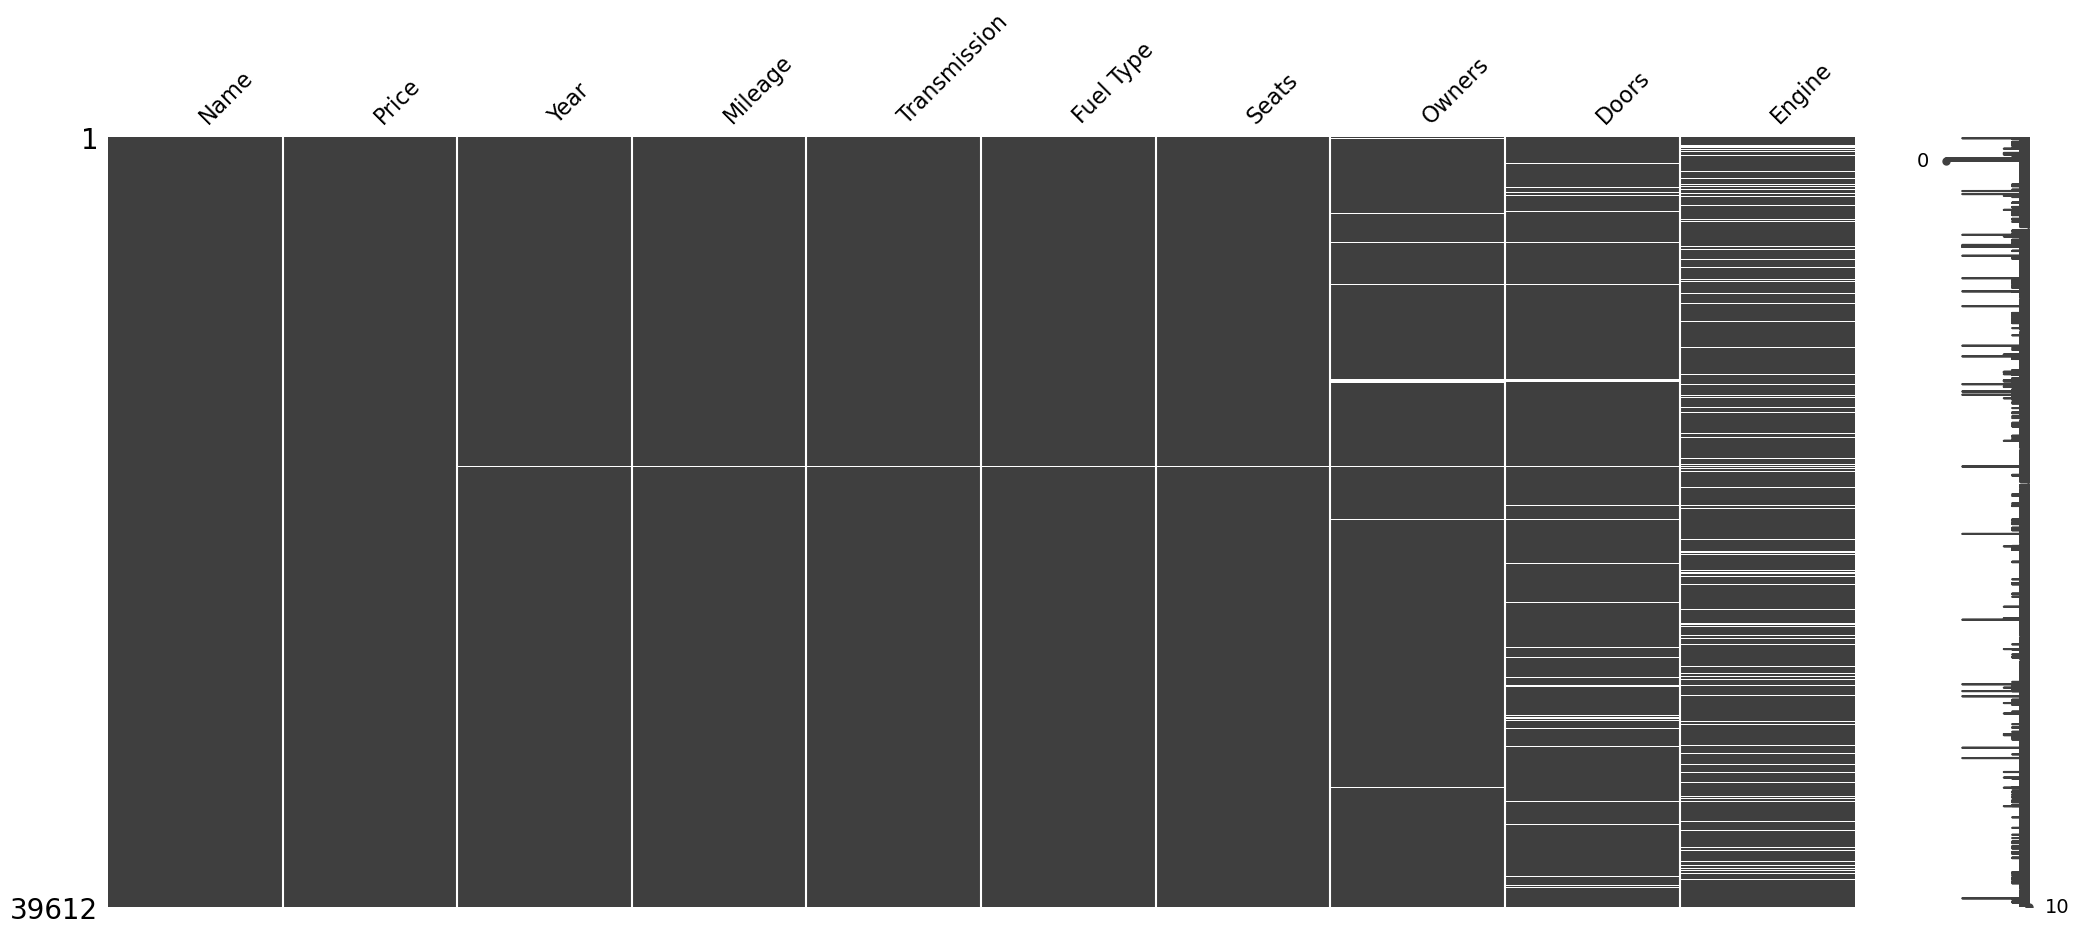

In [14]:
missingno.matrix(used_cars, fontsize = 16)
plt.show()

In [15]:
missing_values_count = used_cars.isnull().sum(axis=1)

rows_to_keep = (missing_values_count == 0) | ((missing_values_count == 1) & used_cars['Engine'].isnull())

used_cars = used_cars[rows_to_keep]

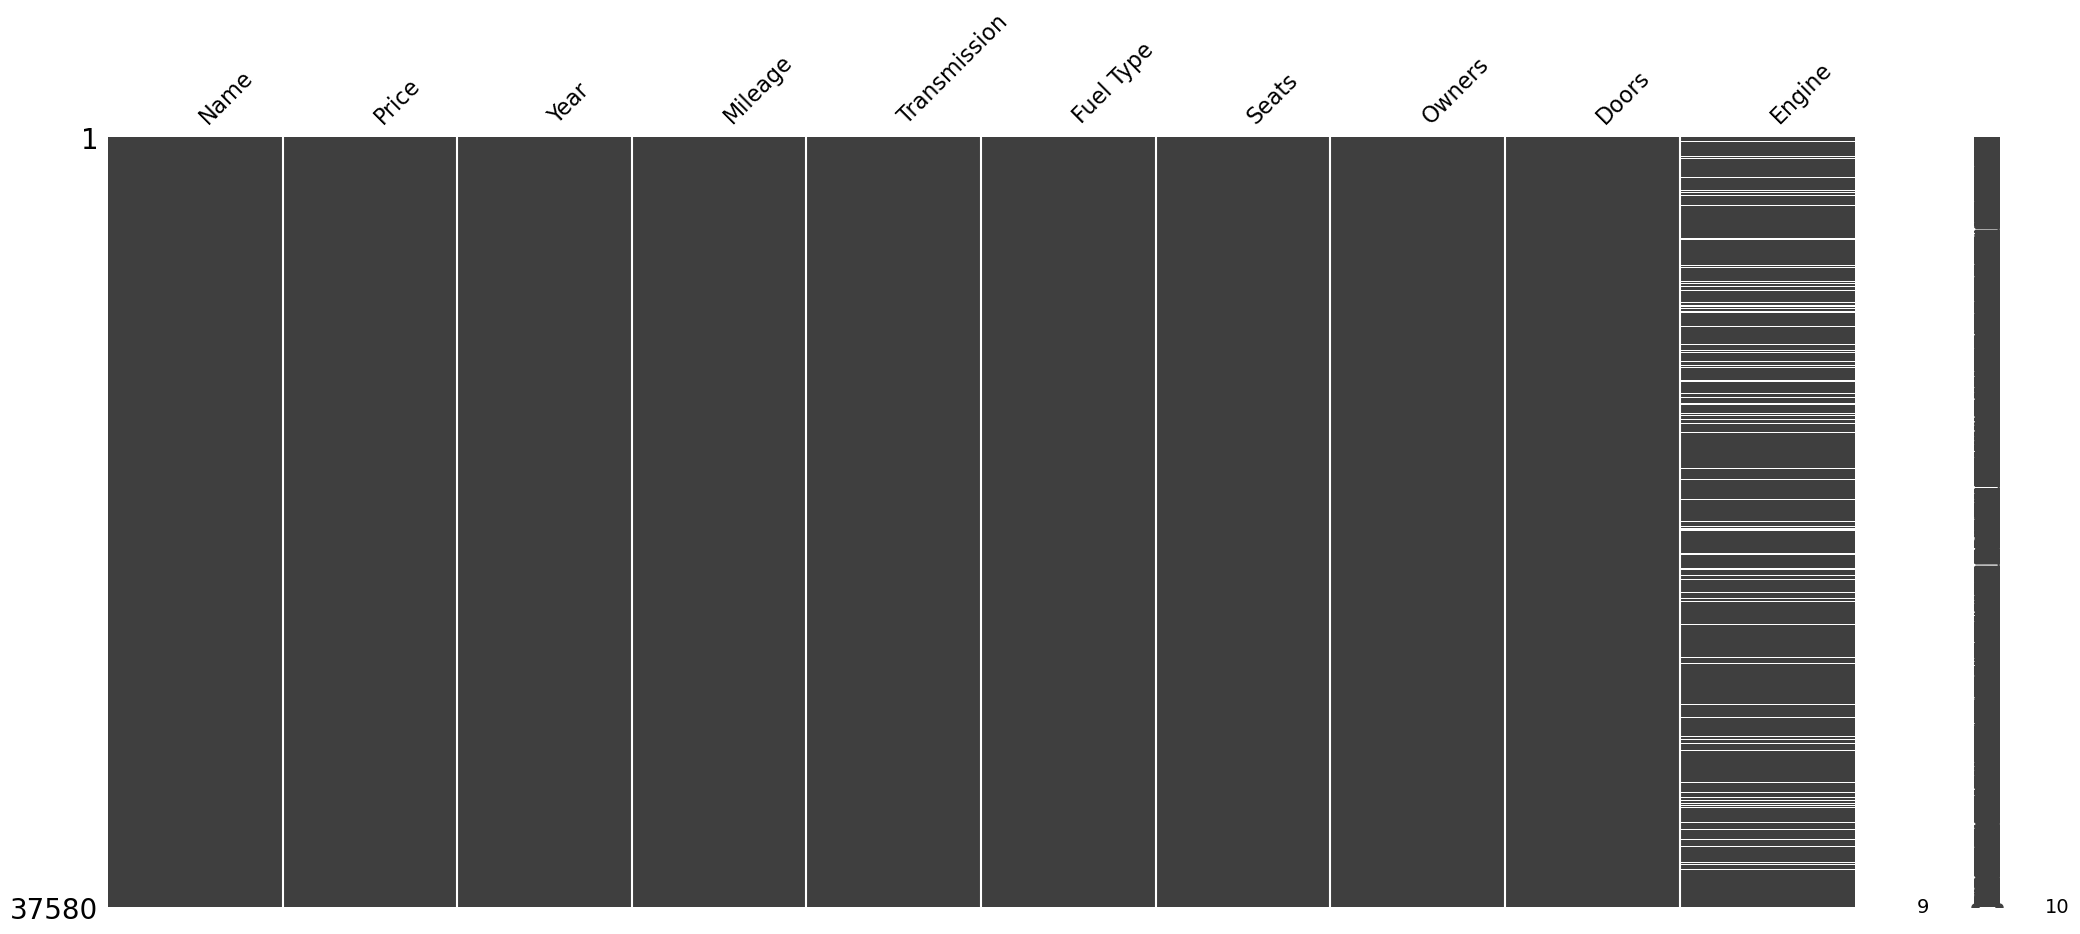

In [16]:
missingno.matrix(used_cars, fontsize = 16)
plt.show()

This was my original tactic of cleaning the data <strong>"Considering the scale of the dataset, which originally consisted of 39,612 rows, a decision was made to address missing values by opting to drop the respective rows. Following this data cleaning step, the dataset now contains 33,779 rows. This process resulted in the removal of 5,833 rows that contained missing values. The decision to drop these rows was driven by a desire to ensure the integrity of the dataset and facilitate subsequent analyses. While this approach has reduced the overall size of the dataset, the remaining 33,779 rows now provide a more complete and refined set of data for further exploration and modeling purposes."</strong> However, upon conducting further data analysis, I discovered an unintended consequence: a significant reduction in the representation of electric cars within the dataset. This occurred because electric cars typically lack engine size data, causing them to be unintentionally excluded during the initial cleaning process.

In [17]:
used_cars['Brand'] = used_cars['Name'].str.split().str[0]

### 4 Explanatory Data Analysis
<hr style="height: 0.5px; border: 0; background-color: #808080">

#### 4.1 Univariate Data Analysis



In [18]:
fig_1 = make_subplots(rows=1, cols=1, specs=[[{'type':'xy'}]])
fig_1.add_trace(go.Box(x=used_cars['Mileage'], name='Miles Driven'))
fig_1.update_traces(marker_color='Salmon')
fig_1.update_layout(showlegend=False, 
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

fig_1.show()

fig_2 = make_subplots(rows=1, cols=1, specs=[[{'type':'xy'}]])
fig_2.add_trace(go.Box(x=used_cars['Price'], name='Car Price'))
fig_2.update_traces(marker_color='Salmon')
fig_2.update_layout(showlegend=False, 
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

fig_2.show()

fig_3 = make_subplots(rows=1, cols=1, specs=[[{'type':'xy'}]])
fig_3.add_trace(go.Box(x=used_cars['Engine'], name='Engine Size'))
fig_3.update_traces(marker_color='Salmon')
fig_3.update_layout(showlegend=False, 
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

fig_3.show()



<strong>INSIGHTS:</strong> After analysing the numerical data, several key observations have been identified:

<ol>
    <li><strong>Miles Driven:</strong> The majority of listed cars have driven between 7,000 and 30,000 miles. The car with the highest mileage has driven just under 100,000 miles.</li>
    <li><strong>Car Price:</strong> Most listed cars are priced between £15,000 and £30,000. The least expensive car is listed just under £5,000, while the most expensive is listed for just under £250,000.</li>
    <li><strong>Engine Size:</strong> The majority of listed cars have an engine size between 1.2 and 2 litres.</li>
</ol>


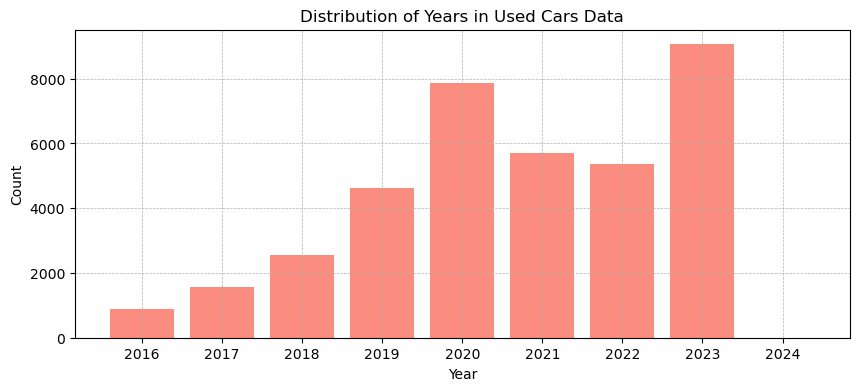

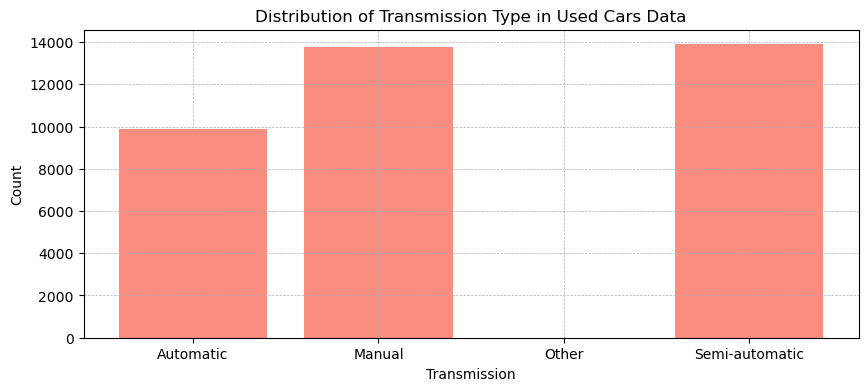

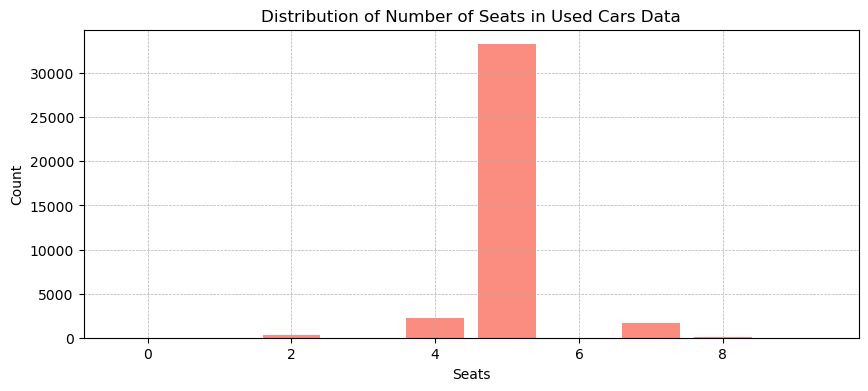

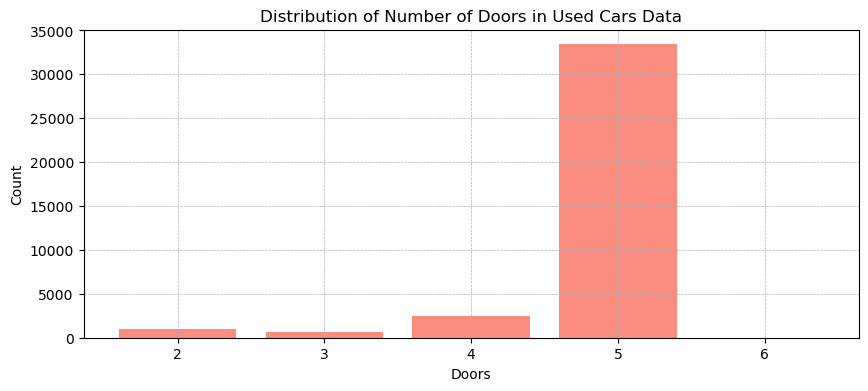

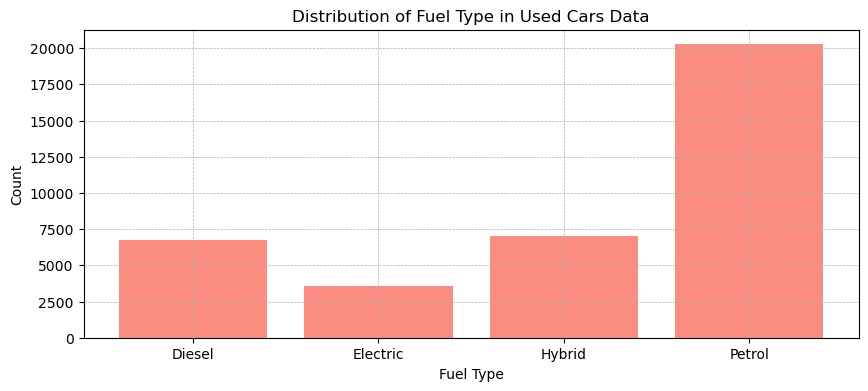

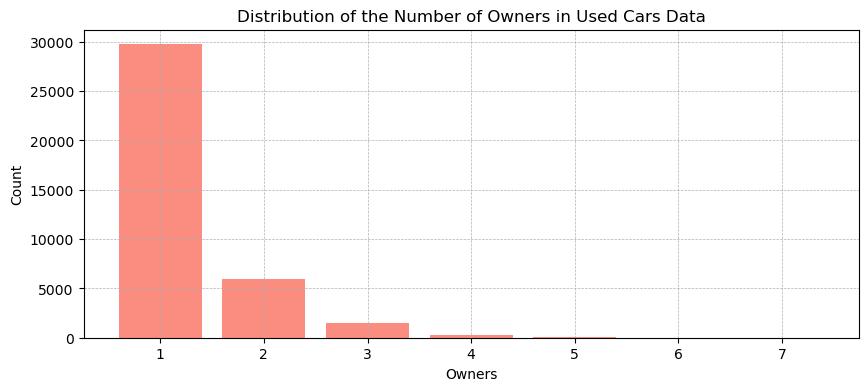

In [19]:
def plot_distribution(data, x_label, y_label, title):
    plt.figure(figsize=(10, 4))
    plt.grid(True, which='major', linestyle='--', linewidth=0.5)
    plt.bar(data[x_label], data[y_label], width=0.8, color='salmon', alpha=0.9)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

year_counts_sorted = used_cars.groupby('Year').size().reset_index(name='Count')
plot_distribution(year_counts_sorted, 'Year', 'Count', 'Distribution of Years in Used Cars Data')

transmission_counts = used_cars.groupby('Transmission').size().reset_index(name='Count')
plot_distribution(transmission_counts, 'Transmission', 'Count', 'Distribution of Transmission Type in Used Cars Data')

seats_count = used_cars.groupby('Seats').size().reset_index(name='Count')
plot_distribution(seats_count, 'Seats', 'Count', 'Distribution of Number of Seats in Used Cars Data')

doors_count = used_cars.groupby('Doors').size().reset_index(name='Count')
plot_distribution(doors_count, 'Doors', 'Count', 'Distribution of Number of Doors in Used Cars Data')

fuel_type = used_cars.groupby('Fuel Type').size().reset_index(name='Count')
plot_distribution(fuel_type, 'Fuel Type', 'Count', 'Distribution of Fuel Type in Used Cars Data')

number_of_owners = used_cars.groupby('Owners').size().reset_index(name='Count')
plot_distribution(number_of_owners, 'Owners', 'Count', 'Distribution of the Number of Owners in Used Cars Data')

<strong>INSIGHTS:</strong> After analysing the categorical data, several key observations have been identified:

<ol>
    <li><strong>Manufacturing Years:</strong> The predominant manufacturing years for cars in this dataset are 2023, closely followed by 2020.</li>
    <li><strong>Transmission Types:</strong> Notably, the dataset exhibits an unusual distribution of transmission types, with a majority of cars being semi-automatic. It's worth noting that this might not accurately represent the real-world distribution, where manual transmissions still constitute over 70 percent of vehicles on the road. But we will explore more shortcomings and bias of this data set later in the analysis.</li>
    <li><strong>Doors:</strong> A significant majority of cars in the dataset are equipped with five doors.</li>
    <li><strong>Seats:</strong> Similarly, the majority of cars in the dataset are configured with five seats.</li>
    <li><strong>Fuel Types:</strong> The prevalent fuel type among the cars is petrol.</li>
    <li><strong>Ownership History:</strong> A noteworthy observation is that a substantial proportion of cars in the dataset have had only one owner throughout their history.</li>
</ol>

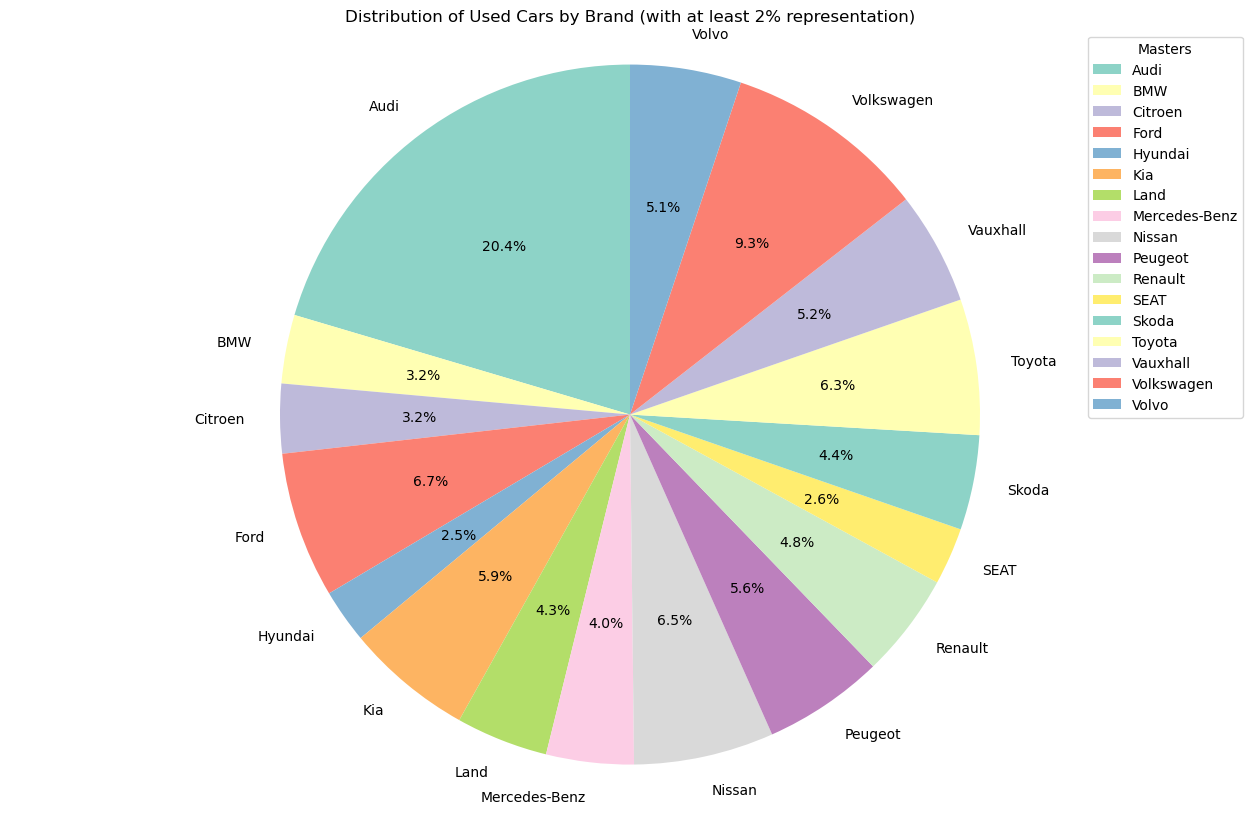

In [28]:
import seaborn as sns
owners = used_cars.groupby('Brand').size().reset_index(name='Count')

total_cars = owners['Count'].sum()

owners = owners[owners['Count'] / total_cars >= 0.02]

plt.figure(figsize=(16, 10))

colors = sns.color_palette('Set3', n_colors=len(owners['Brand']))

plt.pie(owners['Count'], labels=owners['Brand'], autopct='%1.1f%%', startangle=90, colors=colors)


plt.axis('equal')

plt.title('Distribution of Used Cars by Brand (with at least 2% representation)')

plt.legend(owners['Brand'], title='Masters', loc='upper right')

plt.show()


<strong>INSIGHTS:</strong> This pie chart provides a clear overview of the distribution of vehicle brands within the dataset. The bar chart is filtered to display only those brands representing more than two percent, enhancing clarity. The most prevalent car brand in this dataset is Audi, with 6,685 cars produced by this manufacturer. On the other hand, Ineos and Infiniti are the least popular car brands, each with only two car listings.


#### 4.2 Multivariate Data Analysis

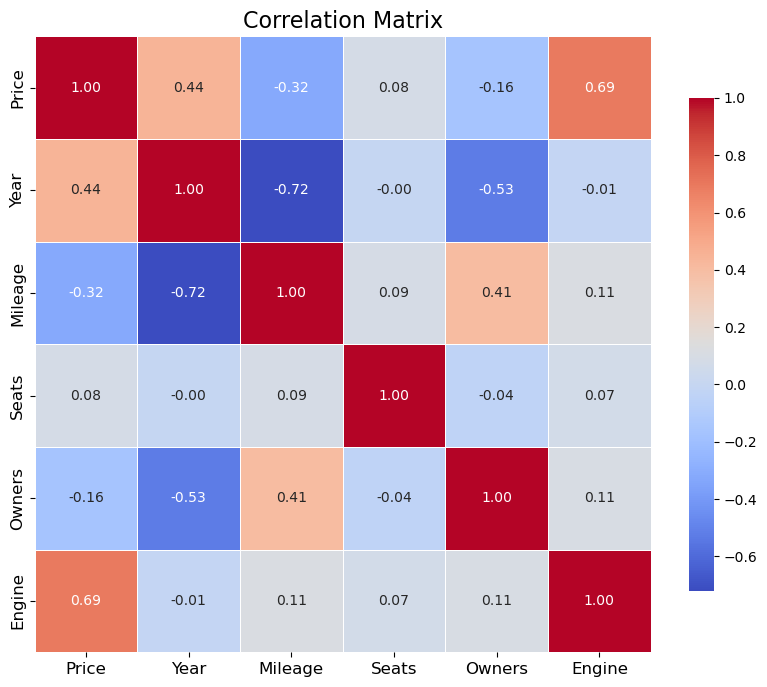

In [29]:
correlation_matrix = used_cars[['Price', 'Year', 'Mileage', 'Seats', 'Owners', 'Engine']].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True, cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [22]:
def create_scatter_plot(data, x_column, y_column, title='', x_title='', y_title='', marker_color='salmon'):
    fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])
    fig.add_trace(go.Scattergl(x=data[x_column],
                               y=data[y_column],
                               mode='markers',
                               marker_color=marker_color))

    fig.update_layout(template='simple_white',
                      title=title,
                      showlegend=False,
                      xaxis={'title': x_title},
                      yaxis={'title': y_title},
                      font=dict(family='Arial',
                                size=12,
                                color='black'))

    fig.show()
    
create_scatter_plot(used_cars, 'Mileage', 'Price', title='Price Against Mileage', x_title='Miles Driven', y_title='Car Price (£)')

engine_count = used_cars.groupby('Engine')['Price'].mean().reset_index(name='Price') 
create_scatter_plot(engine_count, 'Engine', 'Price', title='Mean Price Against Engine Size', x_title='Engine Size (L)', y_title='Mean Car Price (£)')

year_price = used_cars.groupby('Year')['Price'].mean().reset_index(name='Price')
create_scatter_plot(year_price, 'Year', 'Price', title='Mean Price Against Year Manufactured', x_title='Manufacturing Year', y_title='Mean Car Price (£)')

owner_price = used_cars.groupby('Owners')['Price'].mean().reset_index(name='Price')
create_scatter_plot(owner_price, 'Owners', 'Price', title='Mean Price Against Number of Owners')


<strong>INSIGHT:</strong> Upon analysing the correlation matrix and visualisations created, it is evident that the data exhibits a robust positive linear relationship between price and manufacturing year. Additionally, there is a moderately positive correlation between price and engine size. Surprisingly however, there is a weak correlation between numbers and price, and a slight negative relationship between price and miles driven. These findings underscore the complexity of determining the price of a used vehicle, highlighting that relying on a comparison of just two factors may not be sufficient.

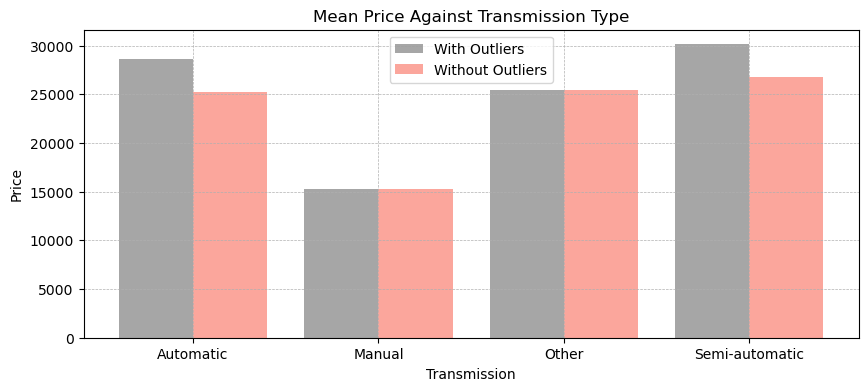

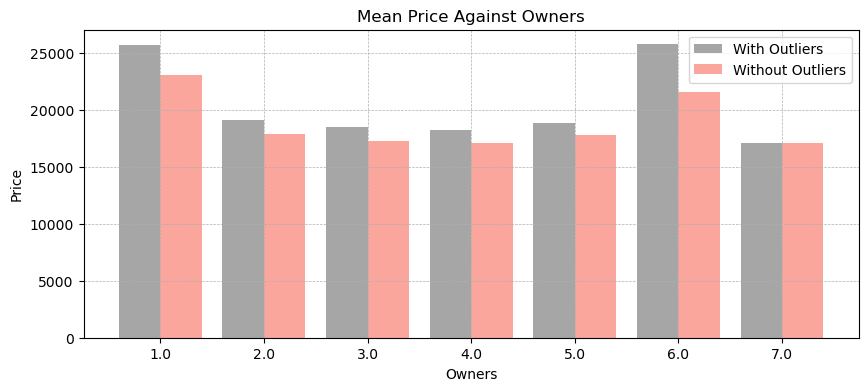

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_distribution(data_list, x_label, y_label, title, labels, colors):
    plt.figure(figsize=(10, 4))
    plt.grid(True, which='major', linestyle='--', linewidth=0.5)
    
    bar_width = 0.4
    for i, data in enumerate(data_list):
        x_values = range(len(data[x_label]))
        plt.bar([x + i * bar_width for x in x_values], data[y_label], width=bar_width, label=labels[i], color=colors[i], alpha=0.7, align='center')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks([x + (len(data_list) - 1) * bar_width / 2 for x in x_values], data[x_label])
    plt.legend()
    plt.show()

def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

transmission_price_with_outliers = used_cars.groupby('Transmission')['Price'].mean().reset_index(name='Price')
used_cars_no_outliers = remove_outliers(used_cars, 'Price')
transmission_price_no_outliers = used_cars_no_outliers.groupby('Transmission')['Price'].mean().reset_index(name='Price')
plot_distribution([transmission_price_with_outliers, transmission_price_no_outliers], 'Transmission', 'Price', 'Mean Price Against Transmission Type', ['With Outliers', 'Without Outliers'], ['grey', 'salmon'])

owners_price_with_outliers = used_cars.groupby('Owners')['Price'].mean().reset_index(name='Price')
owners_price_no_outliers = used_cars_no_outliers.groupby('Owners')['Price'].mean().reset_index(name='Price')
plot_distribution([owners_price_with_outliers, owners_price_no_outliers], 'Owners', 'Price', 'Mean Price Against Owners', ['With Outliers', 'Without Outliers'], ['grey', 'salmon'])

In [24]:
owner_price = used_cars.groupby('Owners')['Price'].agg(['mean', 'count']).reset_index().round(2)
owner_price.columns = ['Owners', 'Mean Price (£)', 'Count']
owner_price

Owners  Mean Price (£)  Count
0     1.0        25695.15  29745
1     2.0        19127.52   5999
2     3.0        18483.87   1457
3     4.0        18224.86    308
4     5.0        18838.94     54
5     6.0        25780.43     14
6     7.0        17131.67      3

In [25]:
used_cars.head()

Name    Price  Year  Mileage    Transmission Fuel Type  Seats  \
0     Nissan Qashqai  19428.0  2021  11738.0  Semi-automatic    Petrol    5.0   
2     Hyundai Tucson  16999.0  2019  27341.0  Semi-automatic    Petrol    5.0   
4       Toyota Yaris  16490.0  2020  19182.0       Automatic    Hybrid    5.0   
5        Honda Civic  17149.0  2020  31508.0          Manual    Petrol    5.0   
7  Volkswagen Tiguan  17999.0  2021  74225.0  Semi-automatic    Diesel    5.0   

   Owners  Doors  Engine       Brand  
0     1.0    5.0     1.3      Nissan  
2     1.0    5.0     1.6     Hyundai  
4     1.0    5.0     1.5      Toyota  
5     1.0    5.0     NaN       Honda  
7     4.0    5.0     2.0  Volkswagen

### 4 Machine Learning 
<hr style="height: 0.5px; border: 0; background-color: #808080">